<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/S%C3%A3o_Lu%C3%ADs_An%C3%A1lise_de_Viol%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img alt="Jonh Selmo" width="40%" src="http://jonhselmo.com.br/wp-content/uploads/2020/06/LOGO-JONH-SELMO-1.png"></center>

by [jonhselmo](https://jonhselmo.com.br)

# ANÁLISE DA CRIMINALIDADE NA GRANDE ILHA DE  SÃO LUÍS / MA

<center><img alt="São Luís" width="60%" src="https://i.pinimg.com/originals/43/c7/cb/43c7cbb6c4d9399e8750835388c5ffde.jpg"></center>

São Luís, frequentemente chamado de São Luís do Maranhão, é  a capital do estado do Maranhão. 

São Luís é a única cidade brasileira fundada por franceses, no dia 8 de setembro de 1612, posteriormente invadida por holandeses e por fim colonizada pelos portugueses. 

No ano de 1997 o centro histórico da cidade foi declarado patrimônio cultural da humanidade pela UNESCO.

Localiza-se na ilha de Upaon-Açu no Atlântico Sul, entre as baías de São Marcos e São José de Ribamar, no Golfão Maranhense. Mas além do município de São Luís, a ilha de Upaon-Açu possui os municípios de São José de Ribamar, Paço do Lumiar e Raposa.

Na análise, serão utilizados dados de todos os municípios que integram a Grande Ilha.




<center><img alt="Grande Ilha de São Luís" width="60%" src="https://www.researchgate.net/profile/Zafira_Almeida/publication/317254654/figure/fig5/AS:628869992312832@1526945698883/Figura-1-Localizacao-da-Ilha-de-Sao-Luis-MA-Brasil.png"><legend</center>

Fonte: [link](https://www.researchgate.net/profile/Zafira_Almeida/publication/317254654/figure/fig5/AS:628869992312832@1526945698883/Figura-1-Localizacao-da-Ilha-de-Sao-Luis-MA-Brasil.png)







# FONTE DE DADOS

Os dados utilizados são as ocorrências de MVI para o município de São Luís monitorados pelo Centro de Apoio Operacional Criminal, do Ministério Público do Estado do Maranhão, do período de 2017 a 2020.



## MVI

A metodologia MVI (Mortes Violentas Intencionais) é a forma utilizada Instituto de Pesquisas Econômicas Aplicada (IPEA) e pelo Fórum Brasileiro de Segurança Pública (FSBP) para a elaboração dos “Atlas da Violência”. Os MVIs contemplam, como forma de mortalidade violenta, os homicídios dolosos, latrocínios (roubos seguidos de morte), lesões corporais seguida de morte, vitimização policial, mortes decorrentes de intervenção policial, lesões com morte posterior, mortes em estabelecimentos prisionais e mortes a esclarecer com indícios de crime.

## DATASET

Abaixo temos a definicção do caminho do dataset.

In [1]:
#importação de bibliotecas necessárias
import pandas as pd

df_vslz = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/MVIMPMA.csv')

Verificação das primeiras 05 lihas do dataframe.

In [2]:
#visualização das 05 primeiras entradas
df_vslz.head()

,ID,Data,Sexo,Idade,Horário,CAUSA DA MORTE,Local,Município,Classificação
0,1,01/01/2017,masculino,22.0,03:01:00,ARMA BRANCA,Coroadinho,São Luís,HOMICÍDIO DOLOSO
1,2,01/01/2017,masculino,30.0,00:21:00,ARMA DE FOGO,Liberdade,São Luís,HOMICÍDIO DOLOSO
2,3,01/01/2017,masculino,23.0,18:30:00,ARMA DE FOGO,São Raimundo,São Luís,HOMICÍDIO DOLOSO
3,4,01/01/2017,masculino,38.0,20:21:00,ARMA DE FOGO,Vila Conceição – Coroadinho,São Luís,HOMICÍDIO DOLOSO
4,5,01/01/2017,feminino,49.0,23:22:00,ARMA DE FOGO,Vila Vitória,São Luís,HOMICÍDIO DOLOSO


##Quantidade de registros


Verificação do quantitativo de registros.

In [3]:
print('Quantidade de linhas:  {}'.format(df_vslz.shape[0]))
print('Quantidade de colunas: {}'.format(df_vslz.shape[1]))

Quantidade de linhas:  1518
Quantidade de colunas: 9


# TIPOS DE DADOS

A verificação dos tipos de dados é realizado pelo código abaixo:

In [4]:
#tipos dos dados das colunas
df_vslz.dtypes

ID                  int64
Data               object
Sexo               object
Idade             float64
Horário            object
CAUSA DA MORTE     object
Local              object
Município          object
Classificação      object
dtype: object

Percebe-se que os campos Data, Horário e Idade estão com tipos de dados inadequados.
* `Data` - Apresenta tipo ***`string`*** (texto) quando deveria ser do tipo ***`datetime`*** (formato adequado para datas e horários;
* `Horário`- Apresenta tipo ***`string`*** (texto) quando deveria ser do tipo ***`datetime`*** (formato adequado para datas e horários;

## Adequação de tipos de dados indevidos

Depois de verificados os tipos de dados inadequados, o acerto se da a partir dos procedimentos abaixo:
 

In [5]:
#modificação dos tipos de dados

#acerto da coluna Data para o tipo de dado 'datetime'
df_vslz['Data'] = pd.to_datetime(df_vslz['Data'], format= '%d/%m/%Y')

#acerto da coluna Horário para o tipo de dado 'datetime'
df_vslz['Horário'] = pd.to_datetime(df_vslz['Horário'], format='%H:%M:%S')


Verificando novamente os tipos, para constatar as **alterações**


In [6]:
df_vslz.dtypes

ID                         int64
Data              datetime64[ns]
Sexo                      object
Idade                    float64
Horário           datetime64[ns]
CAUSA DA MORTE            object
Local                     object
Município                 object
Classificação             object
dtype: object

##Dicionário de *dados*

A instrução abaixo permite verificar os nomes das colunas do *data frame*.

In [7]:
df_vslz.columns

Index(['ID', 'Data', 'Sexo', 'Idade', 'Horário', 'CAUSA DA MORTE', 'Local',
       'Município', 'Classificação'],
      dtype='object')

Renomear coluna `CAUSA DA MORTE` para `Causa_morte`.

In [8]:
#remomear coluna
df_vslz.rename(columns={'CAUSA DA MORTE': 'Causa_morte'}, inplace=True)

#visualizar as modificações
df_vslz.columns

Index(['ID', 'Data', 'Sexo', 'Idade', 'Horário', 'Causa_morte', 'Local',
       'Município', 'Classificação'],
      dtype='object')

Com os nomes das colunas, vamos definir o dicionário dos dados.

* `Data` (datetime)- Data da ocorrência do fato;
* `Sexo` (string)- Gênero da vítima;
* `Idade`(string) - Idade da vítima;
* `Horário` (datetime)- Horário da ocorrência do fato;
* `Causa_morte` (string) -  Especificação da causa ou do instrumento utilizado;
    * ARMA DE FOGO;
    * ARMA BRANCA;
    * ESPANCAMENTO;
    * ESTRANGULAMENTO;
    * OUTROS MEIOS;
* `Local` (string)- Bairro ou localidade da ocorrência;
* `Município` (string)- Município da Grande Ilha de São Luís;
* `Classificação`(string) - Classificação da ocorrência
    * HOMICÍDIO DOLOSO;
    * LESÃO CORPORAL SEGUIDA DE MORTE;
    * LATROCÍNIO;
    * MORTE DECORRENTE DE INTERVENÇÃO POLICIAL;
    * MORTE A ESCLARECER (COM INDÍCIOS DE MVI);
    * MORTE POSTERIOR (COM INDÍCIOS DE MVI)

#VERIFICAÇÃO DE VALORES AUSENTES

Valores ausentes influenciam na criação de modelos, distorcendo análises. Por vezes temos que decidir se os registros (linhas) devem ser excluídos ou preenchidos por algum valor, seja ele uma definição de ausente ou algum parâmetro estatístico (moda, mediana, média).

No caso deste dataset optei por preencher o valor faltante por UNKNOWN (desconhecido), para não ter que excluir uma vítima.

##Quantitativos

Nos códigos abaixo verificamos o quantitativo de valores ausentes e o percentual desses valores frente ao total de registros.

In [9]:
#verificação dos valores ausentes

for i in df_vslz.columns:
    print('Valores ausentes em ' + i +': {}'.format(df_vslz[i].isnull().sum()))

Valores ausentes em ID: 0
Valores ausentes em Data: 0
Valores ausentes em Sexo: 3
Valores ausentes em Idade: 14
Valores ausentes em Horário: 25
Valores ausentes em Causa_morte: 1
Valores ausentes em Local: 7
Valores ausentes em Município: 7
Valores ausentes em Classificação: 830


##Percentuais

In [10]:
#porcentagem de valores ausentes
porcentagem = df_vslz[i].isnull().sum()/ df_vslz.shape[0]
for i in df_vslz.columns:
    print('Valores ausentes em ' + i + ': {:,.2f}% '.format(df_vslz[i].isnull().sum()/ df_vslz.shape[0] * 100))

Valores ausentes em ID: 0.00% 
Valores ausentes em Data: 0.00% 
Valores ausentes em Sexo: 0.20% 
Valores ausentes em Idade: 0.92% 
Valores ausentes em Horário: 1.65% 
Valores ausentes em Causa_morte: 0.07% 
Valores ausentes em Local: 0.46% 
Valores ausentes em Município: 0.46% 
Valores ausentes em Classificação: 54.68% 


Observa-se que o campo `Classificação` é o que mais deve ser trabalhado, apresentando mais de 54% dos dados faltantes.

Preenchimento dos valores faltantes.

##CORRELAÇÃO

Na análise desta seção, verificaremos a correlação entre as colunas.

A correlação mede a relação de dependência entre as varíaveis, sendo extremamente útil para análises futuras utilizando técnicas de ML - Machine Learning (Aprendizagem de máquina).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


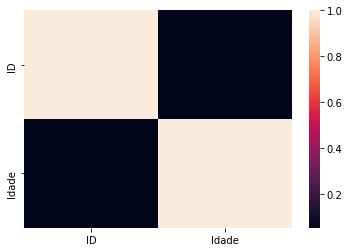

In [11]:
#para tal importaremos a biblioteca seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook


fig, ax = plt.subplots()

sns.heatmap(df_vslz.corr())
plt.show()

Verificamos que o algoritimo encontrou apenas a variavel idade, por entender que apresenta valores numéricos. 

Podemos optar em realizar um mapeamento das variáveis `Sexo`, `Município`, `Causa_morte` e `Classificação` quando formos trabalhar com modelos de ML.

#AGRUPAMENTOS

Realizaremos algumas visualizações de agrupamentos.

##Totais



In [12]:
#print(df_vslz.groupby(['Município']))
df_vslz.groupby(['Município'])['ID'].count()

Município
Paço do Lumiar          107
Raposa                   22
São José de Ribamar     227
São Luis                  1
São Luís               1154
Name: ID, dtype: int64

In [13]:
#Filtrar o valor máximo para usálo nos limites da imagem
df_vslz.groupby(['Município'])['ID'].count().max()

#atribuí-lo para variável ymaximo
ymaximo_g01 = df_vslz.groupby(['Município'])['ID'].count().max()

Foi criado novamente a rotina para o gráfico 02


In [14]:
#atribuí-lo para variável ymaximo
ymaximo_g02 = df_vslz.groupby(['Causa_morte'])['ID'].count().max()

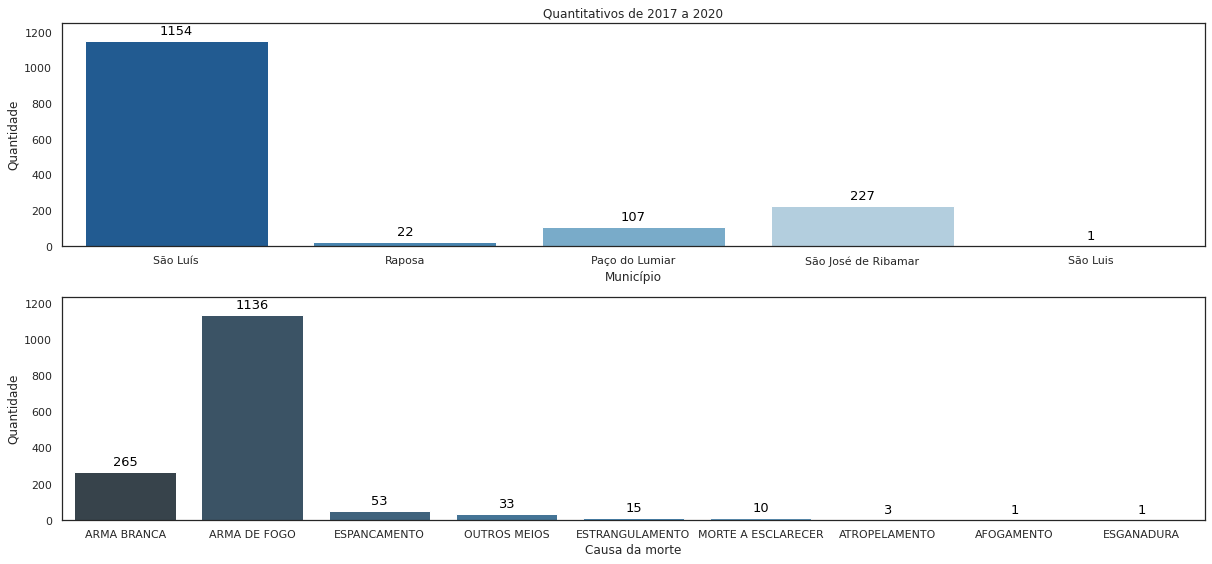

In [15]:
#ANO
sns.set(style="white")
#sns.palplot(sns.dark_palette("purple"))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(17,8))

sns.countplot(df_vslz['Município'], palette='Blues_r', ax=ax1)
#https://seaborn.pydata.org/tutorial/color_palettes.html
ax1.set_title('Quantitativos de 2017 a 2020')
ax1.set_xlabel('Município')
ax1.set_ylabel('Quantidade')
#instrução para que o rótulo não sobreponha a grade que circunda o gráfico
ax1.set_ylim(0, ymaximo_g01 + 100)

#GRÁFICO 01
#laço para inclusão dos rótulos
for p in ax1.patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')
 #To make space for the annotations

#GRÁFICO 02
sns.countplot(df_vslz['Causa_morte'], palette='Blues_d', ax=ax2)
ax2.set_xlabel('Causa da morte')
ax2.set_ylabel('Quantidade')
#instrução para que o rótulo não sobreponha a grade que circunda o gráfico
ax2.set_ylim(0, ymaximo_g02 + 100)

#laço para inclusão dos rótulos
for p in ax2.patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')

fig.show()
#fig.autofmt_xdate()
fig.tight_layout()
plt.show()

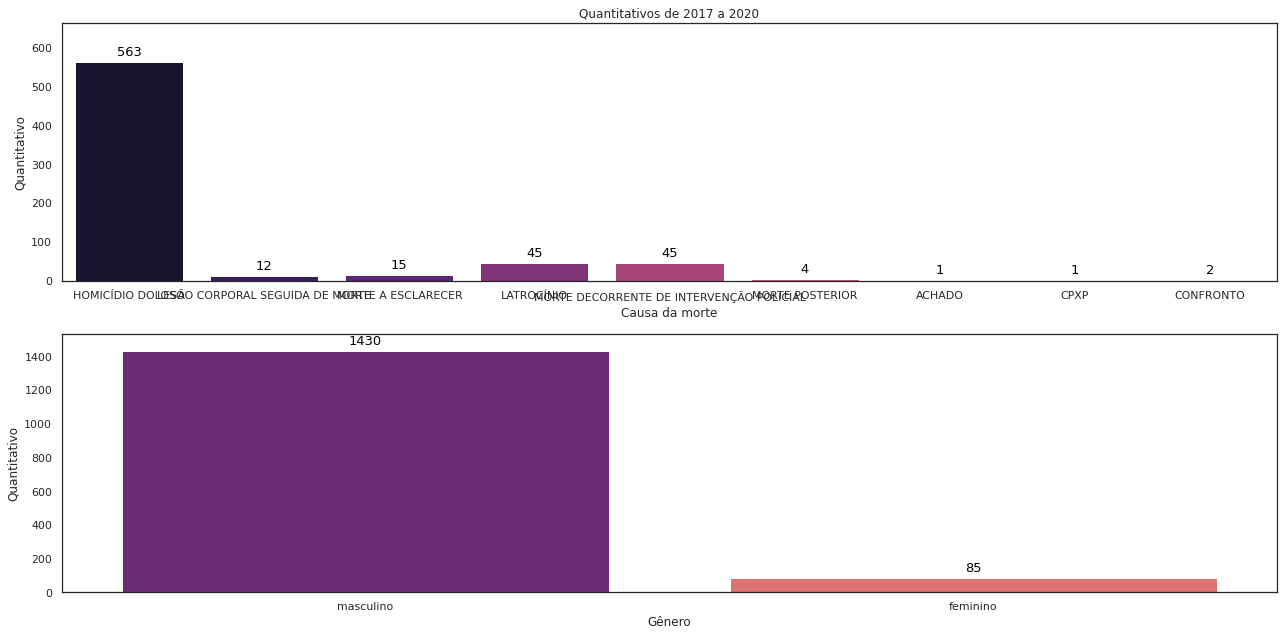

In [16]:
ymaximo_g03 = df_vslz.groupby(['Classificação'])['ID'].count().max()
ymaximo_g04 = df_vslz.groupby(['Sexo'])['ID'].count().max()

sns.set(style="white")
fig, axe = plt.subplots(2,1, figsize=(18,9))

#GRÁFICO 03
#sns.countplot(df_vslz['Classificação'], palette='magma', ax=axe[0,0]) 
sns.countplot(df_vslz['Classificação'], palette='magma', ax=axe[0])

axe[0].set_title('Quantitativos de 2017 a 2020')
axe[0].set_ylabel('Quantitativo')
axe[0].set_xlabel('Causa da morte')
axe[0].set_ylim(0, ymaximo_g03 + 100)
for p in axe[0].patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             axe[0].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')

#GRÁFICO 04
sns.countplot(df_vslz['Sexo'], palette='magma', ax=axe[1])
#axe[1].set_title('Gênero da vítima')
axe[1].set_ylabel('Quantitativo')
axe[1].set_xlabel('Gênero')
axe[1].set_ylim(0, ymaximo_g04 + 100)
for p in axe[1].patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             axe[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')


fig.show()
#
fig.tight_layout()


In [17]:
#Forma alternativa para gŕafico de gênero
#sns.catplot(x="Sexo", kind="count", palette="Set2", data=df_vslz);

Tratamento dos gráficos para valores segmentados por ano

In [18]:
df_vslz['Data'].dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
1513    2017
1514    2017
1515    2017
1516    2017
1517    2017
Name: Data, Length: 1518, dtype: int64

In [19]:
df_vslz['Data'].dt.year.value_counts()


2017    635
2018    408
2019    329
2020    146
Name: Data, dtype: int64

Com os filtros do DataFrame estabelecidos, foi criado os valores segmentados por ano.

<bound method Figure.tight_layout of <Figure size 1224x576 with 1 Axes>>

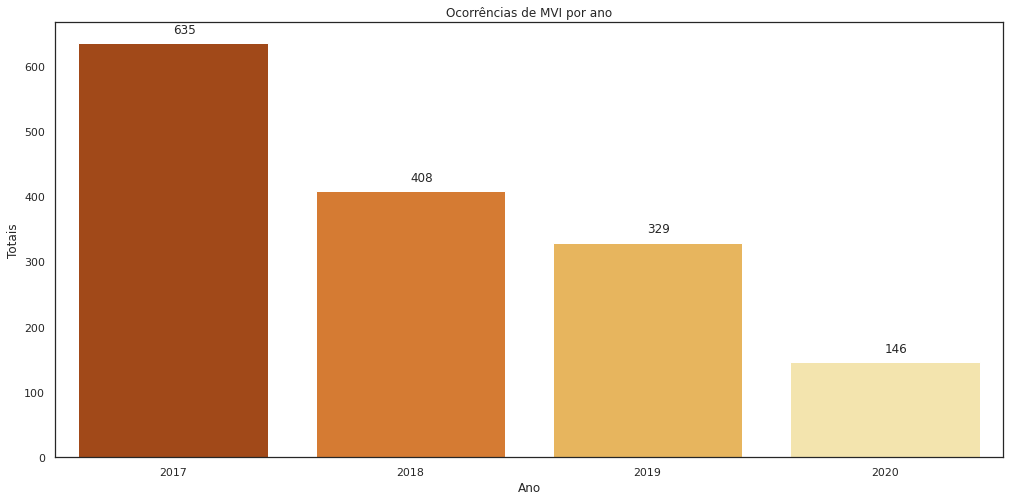

In [20]:
x = df_vslz['Data'].dt.year
sns.set(style='white')
fig, ax = plt.subplots(figsize = (17,8))
sns.countplot(x, palette='YlOrBr_r', ax=ax)
ax.set_title('Ocorrências de MVI por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Totais')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )
#fig.autofmt_xdate()
fig.tight_layout

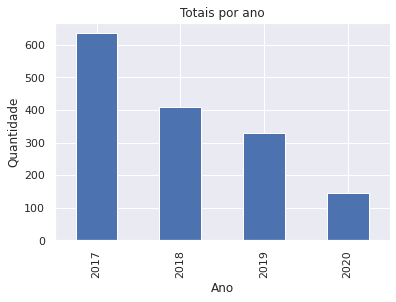

In [21]:
#Rotina alternativa
y = df_vslz['Data'].dt.year.value_counts()
sns.set()
y.plot(kind='bar')
plt.title('Totais por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
fig.autofmt_xdate()

##RECORTE

Será realizado o recorte dos instrumentos utilizados segmentados por municípios da Grande Ilha.

O novo DataFrame será criado a partir do pivotamento do DataFrame original, utilizando  a variável `Município` como coluna, a variável `ID` como index e os dados da variável `Causa_morte` como valores.

In [22]:
#pivotamento para criação de novo DataFrame 
df_instrm = pd.pivot(df_vslz, values='Causa_morte',index='ID', columns='Município')

In [23]:
#Visualização do novo DataFrame
df_instrm

Município,NaN,Paço do Lumiar,Raposa,São José de Ribamar,São Luis,São Luís
ID,,,,,,
1,NaN,NaN,NaN,NaN,NaN,ARMA BRANCA
2,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
3,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
4,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
5,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
...,...,...,...,...,...,...
1514,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
1515,NaN,NaN,ARMA DE FOGO,NaN,NaN,NaN
1516,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO


Realizar a contagem dos registros de Causa da Morte / Instrumento utilizado para cada município, de 2017 a 2020.

In [24]:
#Contagem das ocorrências de Causa da Morte
for muni in df_instrm.columns:
    print(muni)
    print('==========')
    print(df_instrm[muni].value_counts())
    print('\n')

nan
ARMA DE FOGO    5
ESPANCAMENTO    1
ARMA BRANCA     1
Name: nan, dtype: int64


Paço do Lumiar
ARMA DE FOGO          68
ARMA BRANCA           28
ESPANCAMENTO           2
OUTROS MEIOS           2
MORTE A ESCLARECER     2
ESTRANGULAMENTO        2
ATROPELAMENTO          2
Name: Paço do Lumiar, dtype: int64


Raposa
ARMA DE FOGO    17
ARMA BRANCA      5
Name: Raposa, dtype: int64


São José de Ribamar
ARMA DE FOGO          165
ARMA BRANCA            43
ESPANCAMENTO           10
OUTROS MEIOS            5
MORTE A ESCLARECER      3
ESTRANGULAMENTO         1
Name: São José de Ribamar, dtype: int64


São Luis
OUTROS MEIOS    1
Name: São Luis, dtype: int64


São Luís
ARMA DE FOGO          881
ARMA BRANCA           188
ESPANCAMENTO           40
OUTROS MEIOS           25
ESTRANGULAMENTO        12
MORTE A ESCLARECER      5
AFOGAMENTO              1
ATROPELAMENTO           1
ESGANADURA              1
Name: São Luís, dtype: int64




Visualização gráfica das ocorrências acima.

In [25]:
#função para geração do rótulo
def rotulo(ax):
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )

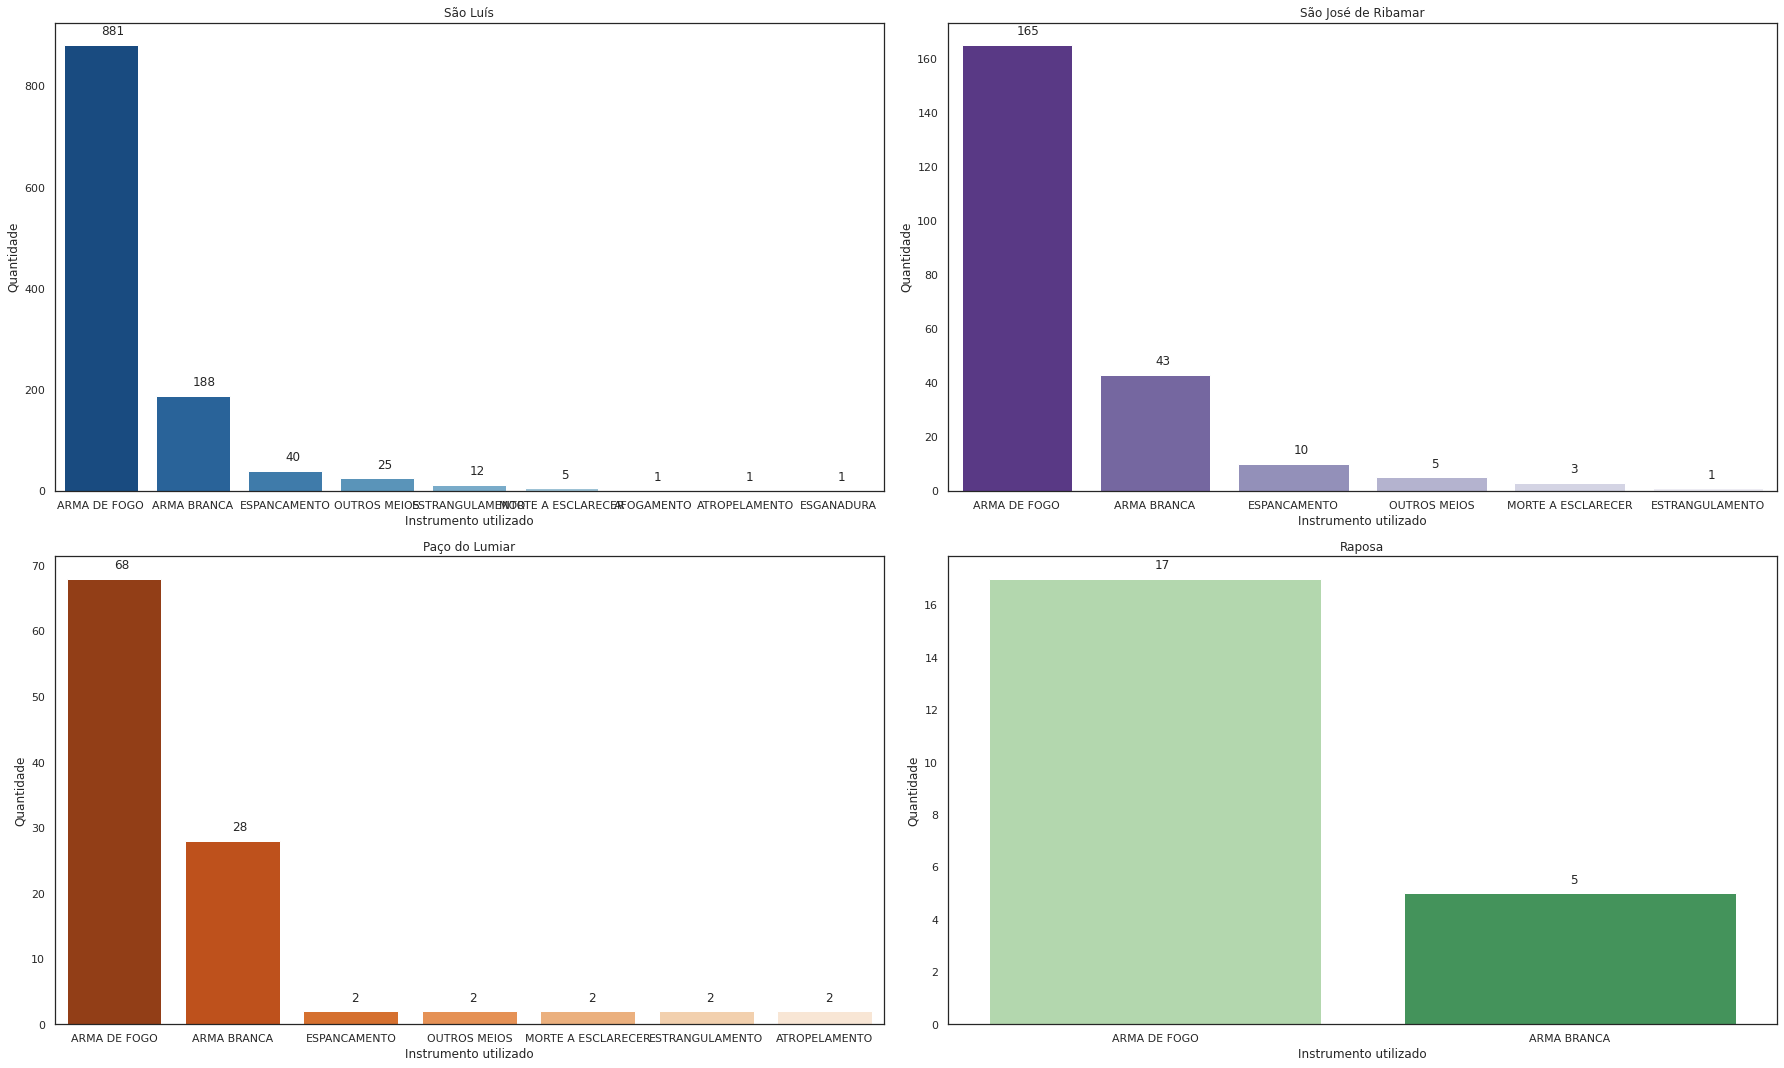

In [35]:
#Gerar gráfico para Causa da morte para os municípios da Grande Ilha
fig, ax=plt.subplots(2,2, figsize=(25,15))
sns.set(style='white')
sns.countplot('São Luís', palette='Blues_r', data= df_instrm, ax=ax[0,0],
              order = df_instrm['São Luís'].value_counts().index) #ordem decrescente
ax[0,0].set_title('São Luís')
ax[0,0].set_xlabel('Instrumento utilizado')
ax[0,0].set_ylabel('Quantidade')
rotulo(ax[0,0])


sns.countplot('São José de Ribamar', palette='Purples_r' ,data=df_instrm, ax=ax[0,1],
              order = df_instrm['São José de Ribamar'].value_counts().index)
ax[0,1].set_title('São José de Ribamar')
ax[0,1].set_xlabel('Instrumento utilizado')
ax[0,1].set_ylabel('Quantidade')
rotulo(ax[0,1])

sns.countplot('Paço do Lumiar', palette='Oranges_r', data=df_instrm, ax=ax[1,0],
              order = df_instrm['Paço do Lumiar'].value_counts().index)
ax[1,0].set_title('Paço do Lumiar')
ax[1,0].set_xlabel('Instrumento utilizado')
ax[1,0].set_ylabel('Quantidade')
rotulo(ax[1,0])

sns.countplot('Raposa', palette='Greens', data=df_instrm, ax=ax[1,1],
              order = df_instrm['Raposa'].value_counts().index)
ax[1,1].set_title('Raposa')
ax[1,1].set_xlabel('Instrumento utilizado')
ax[1,1].set_ylabel('Quantidade')
rotulo(ax[1,1])

fig.show

#fig.autofmt_xdate()
fig.tight_layout()

##2020
Vamos trabalhar apenas com o ano de 2020, realizando o pivotamento por bairros de cada município.

In [27]:
df_2020mvi = df_vslz[df_vslz['Data'].dt.year == 2020]

In [28]:
df_2020mvi.head()

,ID,Data,Sexo,Idade,Horário,Causa_morte,Local,Município,Classificação
1367,1368,2020-01-01,masculino,46.0,1900-01-01 05:27:00,ARMA DE FOGO,Vila Valian,São Luís,HOMICÍDIO DOLOSO
1368,1369,2020-01-02,masculino,19.0,1900-01-01 09:30:00,ARMA BRANCA,Vila Magril,São Luís,HOMICÍDIO DOLOSO
1369,1370,2020-01-03,masculino,44.0,1900-01-01 05:40:00,ARMA DE FOGO,Cohab-Anil III,São Luís,HOMICÍDIO DOLOSO
1370,1371,2020-01-06,masculino,40.0,1900-01-01 02:30:00,ARMA BRANCA,Cidade Operária,São Luís,HOMICÍDIO DOLOSO
1371,1372,2020-01-09,masculino,42.0,1900-01-01 01:40:00,ARMA DE FOGO,Monte Castelo,São Luís,LATROCÍNIO


In [29]:
df_2020mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1367 to 1512
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             146 non-null    int64         
 1   Data           146 non-null    datetime64[ns]
 2   Sexo           146 non-null    object        
 3   Idade          145 non-null    float64       
 4   Horário        146 non-null    datetime64[ns]
 5   Causa_morte    146 non-null    object        
 6   Local          145 non-null    object        
 7   Município      145 non-null    object        
 8   Classificação  146 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 11.4+ KB


In [30]:
df_bairro = pd.pivot(df_2020mvi, values='Local', index='ID', columns='Município')

In [31]:
df_bairro

Município,NaN,Paço do Lumiar,Raposa,São José de Ribamar,São Luis,São Luís
ID,,,,,,
1368,NaN,NaN,NaN,NaN,NaN,Vila Valian
1369,NaN,NaN,NaN,NaN,NaN,Vila Magril
1370,NaN,NaN,NaN,NaN,NaN,Cohab-Anil III
1371,NaN,NaN,NaN,NaN,NaN,Cidade Operária
1372,NaN,NaN,NaN,NaN,NaN,Monte Castelo
...,...,...,...,...,...,...
1509,NaN,NaN,NaN,NaN,NaN,Barramar
1510,NaN,NaN,NaN,Vila Cafeteira,NaN,NaN
1511,NaN,NaN,NaN,NaN,NaN,Recanto dos Signos


In [32]:
for bairro in df_bairro.columns:
    print(bairro)
    print('==========')
    print(df_bairro[bairro].value_counts())
    print('\n')
   

nan
Series([], Name: nan, dtype: int64)


Paço do Lumiar
La Belle Park          2
Parque Araçagy         1
Vila Cafeteira         1
Vila São José – PCL    1
Sítio Natureza         1
Boa Vista              1
Maioba                 1
Conjunto Lima Verde    1
Name: Paço do Lumiar, dtype: int64


Raposa
Parque Florêncio    1
Vila Laci           1
Name: Raposa, dtype: int64


São José de Ribamar
Parque Jair                3
Vila Alcione Ferreira      2
Alto do Turu II            2
Oiteiro                    1
Vila Cafeteira             1
Miritiua                   1
Residencial Turiúba        1
Matinha                    1
Vila Roseana Sarney        1
Mata                       1
Residencial Olímpico       1
Parque Florêncio           1
Vila São Luís – SJR        1
Cohabiano                  1
Turiúba                    1
Alonso Costa               1
vila Mestre Antônio        1
São Brás dos Macacos       1
Centro-SJR                 1
Vila São Luís – Bacanga    1
Vila São José – SJR       

In [33]:
#função para geração do rótulo
def rotulo_h(ax):
    for p in ax.patches:
        ax.annotate(p.get_width(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )

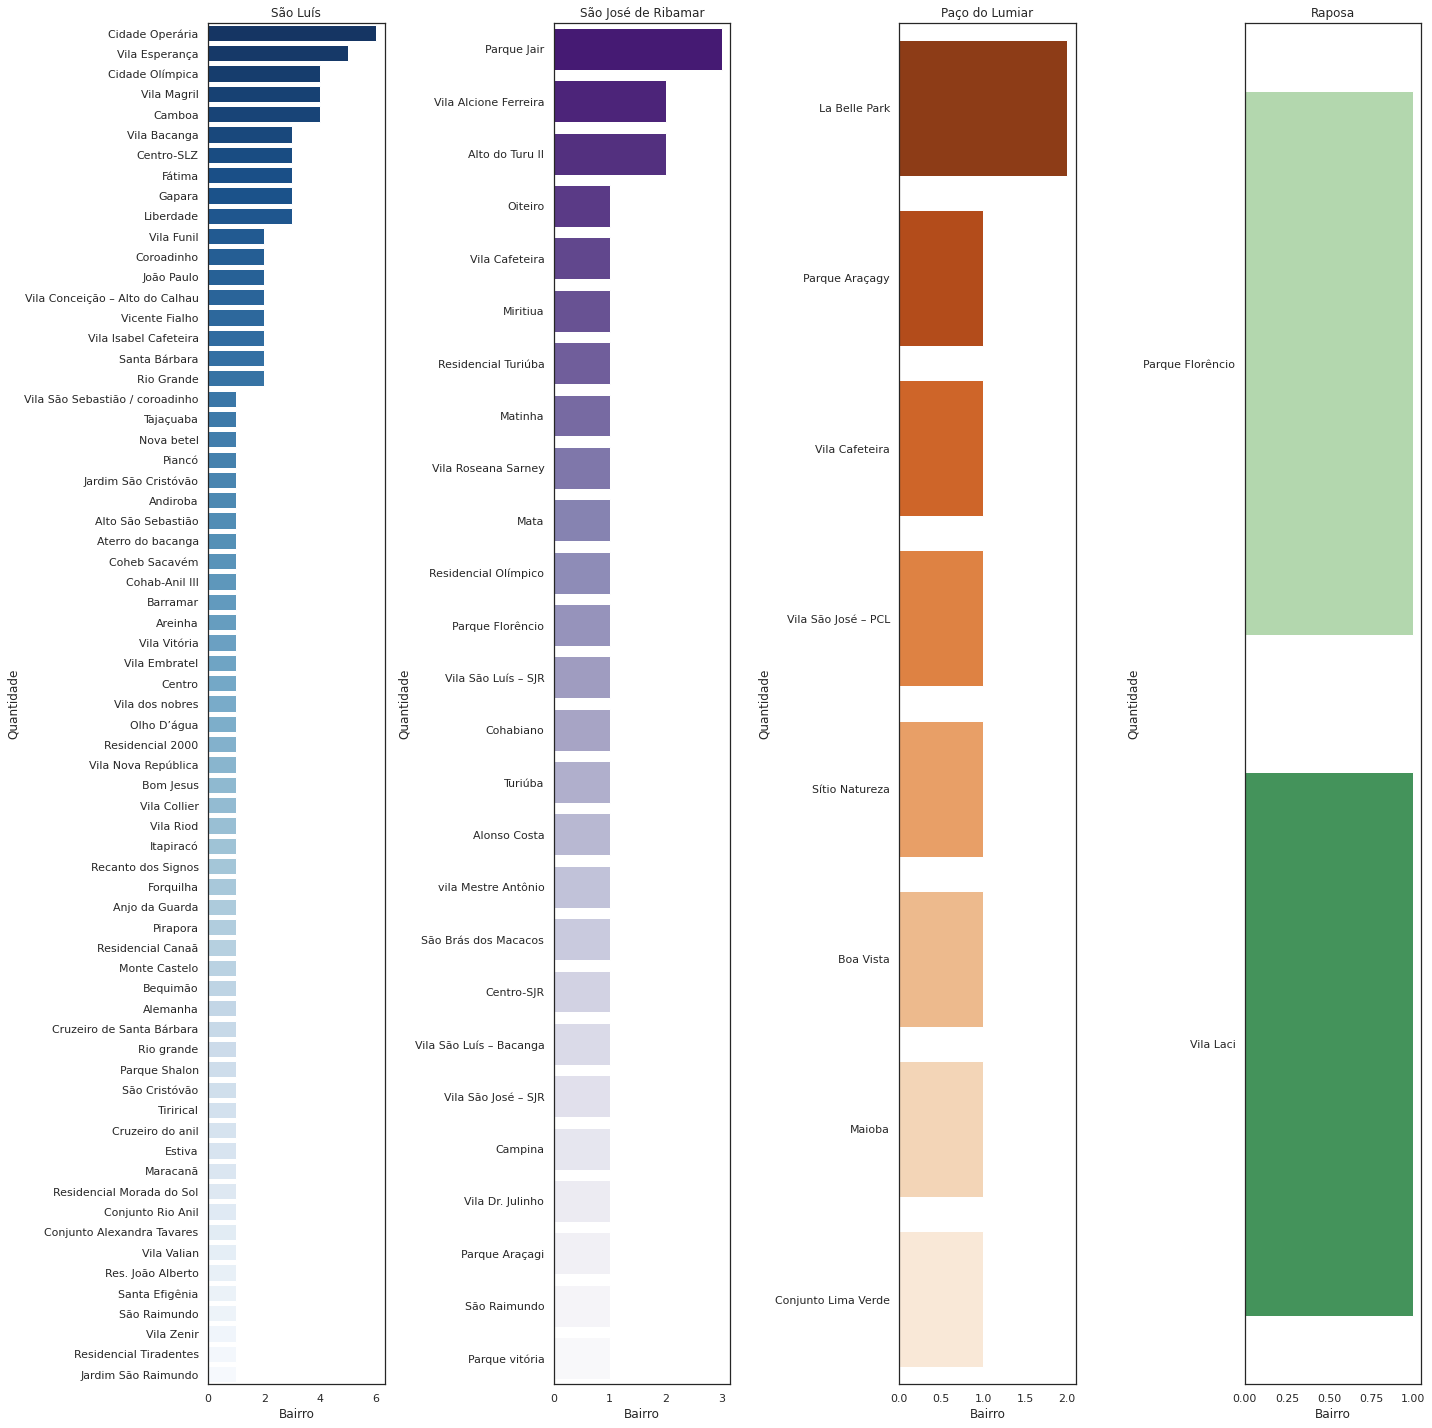

In [34]:
#Gerar gráfico para Causa da morte para os municípios da Grande Ilha
fig, ax=plt.subplots(1,4, figsize=(20,20))
sns.set(style='white')
sns.countplot(y='São Luís', palette='Blues_r', data= df_bairro, ax=ax[0],
              order = df_bairro['São Luís'].value_counts().index) #ordem decrescente
ax[0].set_title('São Luís')
ax[0].set_xlabel('Bairro')
ax[0].set_ylabel('Quantidade')
#rotulo_h(ax[0])



sns.countplot(y='São José de Ribamar', palette='Purples_r' ,data=df_bairro, ax=ax[1],
              order = df_bairro['São José de Ribamar'].value_counts().index)
ax[1].set_title('São José de Ribamar')
ax[1].set_xlabel('Bairro')
ax[1].set_ylabel('Quantidade')
#rotulo(ax[1])

sns.countplot(y='Paço do Lumiar', palette='Oranges_r', data=df_bairro, ax=ax[2],
              order = df_bairro['Paço do Lumiar'].value_counts().index)
ax[2].set_title('Paço do Lumiar')
ax[2].set_xlabel('Bairro')
ax[2].set_ylabel('Quantidade')
#rotulo(ax[2])

sns.countplot(y='Raposa', palette='Greens', data=df_bairro, ax=ax[3],
              order = df_bairro['Raposa'].value_counts().index)
ax[3].set_title('Raposa')
ax[3].set_xlabel('Bairro')
ax[3].set_ylabel('Quantidade')
#rotulo(ax[3])

fig.show

#fig.autofmt_xdate()
fig.tight_layout()